To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [22]:
#install packages if required
#%pip install networkx

In [23]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [24]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [25]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['friedrichshain-center']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [26]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/Berlin/pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [27]:
cities_dict = make_dict(cities)
cities_dict

{'friedrichshain-center': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/friedrichshain-center/friedrichshain-center_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/friedrichshain-center/friedrichshain-center_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/friedrichshain-center/friedrichshain-center_trips.tntp.txt'}}}

# instantiate class

In [28]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [29]:
#set city for investigation
city = cities[0]

In [30]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,31,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
1,1,32,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
2,1,159,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
3,1,161,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
4,2,31,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
518,220,13,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
519,220,68,900.0,112.0,2.666667,1.0,4.0,0.0,0.0,1
520,220,128,900.0,291.0,7.333333,1.0,4.0,0.0,0.0,1
521,221,121,600.0,241.0,6.000000,1.0,4.0,0.0,0.0,1


# Plot graph

Total number of nodes in friedrichshain-center: 224
Total number of edges in friedrichshain-center: 523
Graph for: friedrichshain-center


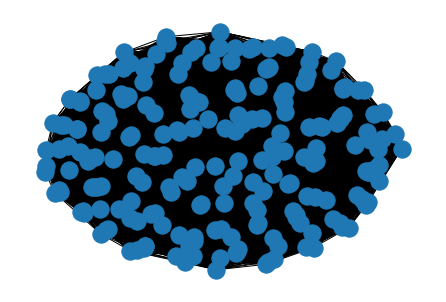

In [31]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [32]:
#observe network with all links
remove_link = 0 #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

friedrichshain-center graph is: DiGraph with 224 nodes and 523 edges
friedrichshain-center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
friedrichshain-center flows are: {('1', '2'): 12.6, ('1', '3'): 4.54, ('1', '4'): 2.21, ('1', '5'): 3.87, ('1', '6'): 3.11, ('1', '7'): 3.08, ('1', '8'): 5.01, ('1', '9'): 34.87, ('1', '10'): 4.98, ('1', '11'): 3.93, ('1', '12'): 6.68, ('1', '13'): 3.45, ('1', '14'): 4.38, ('1', '15'): 3.28, ('1', '16'): 3.37, ('1', '17'): 9.23, ('1', '18'): 13.15, ('1', '19'): 30.07, ('1', '20'): 3.88, ('1', '21'): 5.29, ('1', '22'): 1.4, ('1', '23'): 23.8, ('2', '1'): 12.5, ('2', '3'): 6.25, ('2', '4'): 4.6, ('2', '5'): 7.8, ('2', '6'): 5.27, ('2', '7'): 5.88, ('2', '8'): 7.33, ('2', '9'): 62.53, ('2', '10'): 6.61, ('2', '11'): 8.51, ('2', '12'): 13.34, ('2', '13'): 4.52, ('2', '14'): 5.64, ('2', '15'): 6.42, ('2', '16'): 6.76, ('2', '17'): 19.84, ('2', '18'): 20.36

In [33]:
#observe network after removing one link
remove_link = 1
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

friedrichshain-center graph is: DiGraph with 224 nodes and 522 edges
friedrichshain-center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
friedrichshain-center flows are: {('1', '2'): 12.6, ('1', '3'): 4.54, ('1', '4'): 2.21, ('1', '5'): 3.87, ('1', '6'): 3.11, ('1', '7'): 3.08, ('1', '8'): 5.01, ('1', '9'): 34.87, ('1', '10'): 4.98, ('1', '11'): 3.93, ('1', '12'): 6.68, ('1', '13'): 3.45, ('1', '14'): 4.38, ('1', '15'): 3.28, ('1', '16'): 3.37, ('1', '17'): 9.23, ('1', '18'): 13.15, ('1', '19'): 30.07, ('1', '20'): 3.88, ('1', '21'): 5.29, ('1', '22'): 1.4, ('1', '23'): 23.8, ('2', '1'): 12.5, ('2', '3'): 6.25, ('2', '4'): 4.6, ('2', '5'): 7.8, ('2', '6'): 5.27, ('2', '7'): 5.88, ('2', '8'): 7.33, ('2', '9'): 62.53, ('2', '10'): 6.61, ('2', '11'): 8.51, ('2', '12'): 13.34, ('2', '13'): 4.52, ('2', '14'): 5.64, ('2', '15'): 6.42, ('2', '16'): 6.76, ('2', '17'): 19.84, ('2', '18'): 20.36

# Compute equilibrium flow for example city using Frank-Wolfe algorithm

In [34]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = 0
trial_run.compute_link_flow(city, remove_link)

CPU times: user 6min 49s, sys: 20.2 s, total: 7min 9s
Wall time: 7min 45s


Results for: friedrichshain-center
1  ->  31 :  234.11398994915604
1  ->  32 :  132.2384550275498
1  ->  159 :  715.4118478525752
1  ->  161 :  0.0
31  ->  1 :  753.6019688813525
31  ->  2 :  234.1121422593298
31  ->  40 :  0.0
31  ->  216 :  0.001847689825417041
32  ->  1 :  0.0
32  ->  2 :  0.0
32  ->  31 :  0.0
32  ->  38 :  215.13212407015843
159  ->  1 :  337.18232394792597
159  ->  17 :  715.4118478525752
159  ->  160 :  0.0
159  ->  161 :  0.0
159  ->  174 :  0.0
161  ->  1 :  0.0
161  ->  32 :  0.0
2  ->  31 :  753.6005124429228
2  ->  32 :  82.89366904260838
2  ->  37 :  0.0
2  ->  216 :  158.34097291288163
37  ->  2 :  777.1975650534915
37  ->  31 :  0.0014564384322300638
216  ->  2 :  0.005447085589216465
216  ->  83 :  0.0
216  ->  84 :  0.0
216  ->  218 :  158.34282060270698
3  ->  42 :  548.807993179705
3  ->  44 :  479.01805725150814
3  ->  61 :  0.0
3  ->  62 :  429.79761128854256
42  ->  3 :  113.80439429154706
42  ->  43 :  398.008360106452
42  ->  50 :  150.815156125

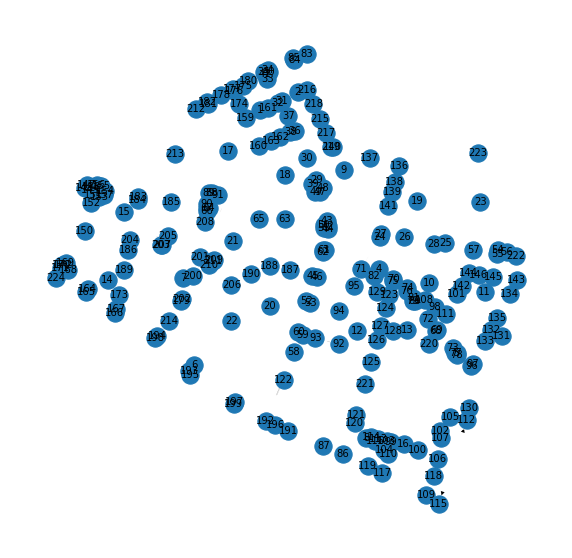

In [35]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Compute equilibrium flow for one closed link in example city using Frank-Wolfe algorithm

In [ ]:
%%time

#compute the eq flow for one example city and one closed link
remove_link = 1
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and one closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [18]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [19]:
#view a network with edge removed
removed_link = 8
trial_run.make_network(city, removed_link)
trial_run.network_attributes(city, removed_link)

friedrichshain-center graph is: DiGraph with 224 nodes and 522 edges
friedrichshain-center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
friedrichshain-center flows are: {('1', '2'): 12.6, ('1', '3'): 4.54, ('1', '4'): 2.21, ('1', '5'): 3.87, ('1', '6'): 3.11, ('1', '7'): 3.08, ('1', '8'): 5.01, ('1', '9'): 34.87, ('1', '10'): 4.98, ('1', '11'): 3.93, ('1', '12'): 6.68, ('1', '13'): 3.45, ('1', '14'): 4.38, ('1', '15'): 3.28, ('1', '16'): 3.37, ('1', '17'): 9.23, ('1', '18'): 13.15, ('1', '19'): 30.07, ('1', '20'): 3.88, ('1', '21'): 5.29, ('1', '22'): 1.4, ('1', '23'): 23.8, ('2', '1'): 12.5, ('2', '3'): 6.25, ('2', '4'): 4.6, ('2', '5'): 7.8, ('2', '6'): 5.27, ('2', '7'): 5.88, ('2', '8'): 7.33, ('2', '9'): 62.53, ('2', '10'): 6.61, ('2', '11'): 8.51, ('2', '12'): 13.34, ('2', '13'): 4.52, ('2', '14'): 5.64, ('2', '15'): 6.42, ('2', '16'): 6.76, ('2', '17'): 19.84, ('2', '18'): 20.36

In [20]:
%%time

trial_run.eq_flow_shut_each_link(city)

KeyboardInterrupt: 

max_edges: 523
Equilibrium flow for removed link number 1 in friedrichshain-center
Results for: friedrichshain-center
1  ->  31 :  234.11398994915604
1  ->  32 :  132.2384550275498
1  ->  159 :  715.4118478525752
1  ->  161 :  0.0
31  ->  1 :  753.6019688813525
31  ->  2 :  234.1121422593298
31  ->  40 :  0.0
31  ->  216 :  0.001847689825417041
32  ->  1 :  0.0
32  ->  2 :  0.0
32  ->  31 :  0.0
32  ->  38 :  215.13212407015843
159  ->  1 :  337.18232394792597
159  ->  17 :  715.4118478525752
159  ->  160 :  0.0
159  ->  161 :  0.0
159  ->  174 :  0.0
161  ->  1 :  0.0
161  ->  32 :  0.0
2  ->  31 :  753.6005124429228
2  ->  32 :  82.89366904260838
2  ->  37 :  0.0
2  ->  216 :  158.34097291288163
37  ->  2 :  777.1975650534915
37  ->  31 :  0.0014564384322300638
216  ->  2 :  0.005447085589216465
216  ->  83 :  0.0
216  ->  84 :  0.0
216  ->  218 :  158.34282060270698
3  ->  42 :  548.807993179705
3  ->  44 :  479.01805725150814
3  ->  61 :  0.0
3  ->  62 :  429.79761128854256
42  -> 

54  ->  23 :  0.0
54  ->  25 :  0.0
54  ->  55 :  100.24957354356906
57  ->  23 :  618.5977010196316
57  ->  55 :  0.0
57  ->  144 :  371.0227468613674
24  ->  27 :  65.29047355602219
24  ->  28 :  697.4583187484067
27  ->  24 :  50.51030872866091
27  ->  42 :  113.81675572860861
27  ->  141 :  65.28737749039763
28  ->  57 :  697.4583187484067
141  ->  27 :  0.0
141  ->  136 :  65.28737749039763
36  ->  37 :  777.1990214919236
36  ->  38 :  0.0019024123463788599
40  ->  34 :  0.0
40  ->  84 :  0.0
38  ->  36 :  0.0
38  ->  39 :  215.13409876305406
38  ->  162 :  0.0019024123463788599
33  ->  32 :  0.0
34  ->  35 :  0.0
35  ->  41 :  0.0
35  ->  180 :  0.0
41  ->  33 :  0.0
41  ->  40 :  0.0
180  ->  177 :  0.0
162  ->  160 :  0.0019024123463788599
49  ->  47 :  0.0
49  ->  50 :  309.76251894358734
84  ->  83 :  0.0
84  ->  85 :  0.0
84  ->  216 :  0.0
43  ->  47 :  398.008360106452
50  ->  51 :  460.56783086839897
50  ->  63 :  0.009844201097090456
45  ->  46 :  0.0011190316585991068
4

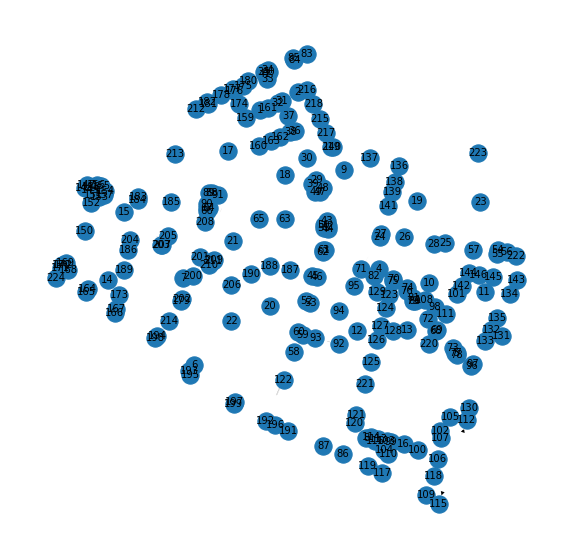

In [21]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

In [ ]:
## for below analysis, remember that the removed_link = 1 means the last row in the trip file is removed. 
# Removed_link = 2 means the second last row is removed, and so on.
# You can use this for the mapping from fw eq flow results to the csv/dataframe.


removed_link = 0
#density
nx.density(cities_dict[city][str(remove_link)]['network'].graph)

#diameter

#nx.diameter(cities_dict[city][str(remove_link)]['network'].graph)

#check this out for centrality https://networkx.org/documentation/stable/reference/algorithms/centrality.html

#betweeness origin

#eigenvector origin

#betweeness destination

#eigenvector destination

#flow - from initial trips file i think 

#cost - will need to compute